In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Note: 
# snow is the heli lidar data at 30meters
# elev is the bare earth from september 2020
# asp is the aspect in degress
# dnbr is difference in normalized burn ratio and varies from -1000 to + 1000
# Xcoord and Ycoord are easting and northing in UTM 11N
df = pd.read_csv('./data/dataframe_geo_30m.csv')

# Remove outliers
df = df[(df['snow'] > 0) & (df['snow'] < 5) ]

# Define aspects (N,E,S,W)
aspects = [
    ((df['asp'] >= 315) | (df['asp'] < 45)),
    ((df['asp'] >= 45) & (df['asp'] < 135)),
    ((df['asp'] >= 135) & (df['asp'] < 225)),
    ((df['asp'] >= 225) & (df['asp'] < 315))
]

nesw = [0, 1, 2, 3]

# Use np select to apply conditions and values
df['aspects'] = np.select(aspects, nesw)

# Define burn severity categories
burn = [
    ((df['dnbr'] < 0)),
    ((df['dnbr'] >= 0))
]

sbs = [0, 1]

# Use np select to apply conditions and values
df['sbs'] = np.select(burn, sbs)

# Group into 4 elevation bands
df1 = df[(df['elev'] >= 1600) & (df['elev'] < 1800)]
df2 = df[(df['elev'] >= 1800) & (df['elev'] < 2000)]
df3 = df[(df['elev'] >= 2000) & (df['elev'] < 2200)]
df4 = df[(df['elev'] >= 2200) & (df['elev'] < 2400)]

In [5]:
df

,snow,elev,asp,dnbr,xcoord,ycoord,aspects,sbs
0,1.709473,2117.374512,32.438465,411,606343,4870857.5,0,1
1,1.827637,2112.877441,33.135609,411,606373,4870857.5,0,1
2,1.798584,2107.450928,93.413132,201,606403,4870857.5,1,1
3,1.525391,2102.551270,0.002197,102,606433,4870857.5,0,1
4,1.875977,2127.436279,22.817955,289,606313,4870827.5,0,1
...,...,...,...,...,...,...,...,...
38492,0.379883,1666.457031,190.574860,-89,605023,4862517.5,2,0
38493,0.109375,1673.962402,213.654862,-74,605053,4862517.5,2,0
38495,0.335449,1670.508545,106.156975,-275,605113,4862517.5,1,0
38496,1.024292,1653.199341,135.028671,-131,605143,4862517.5,2,0


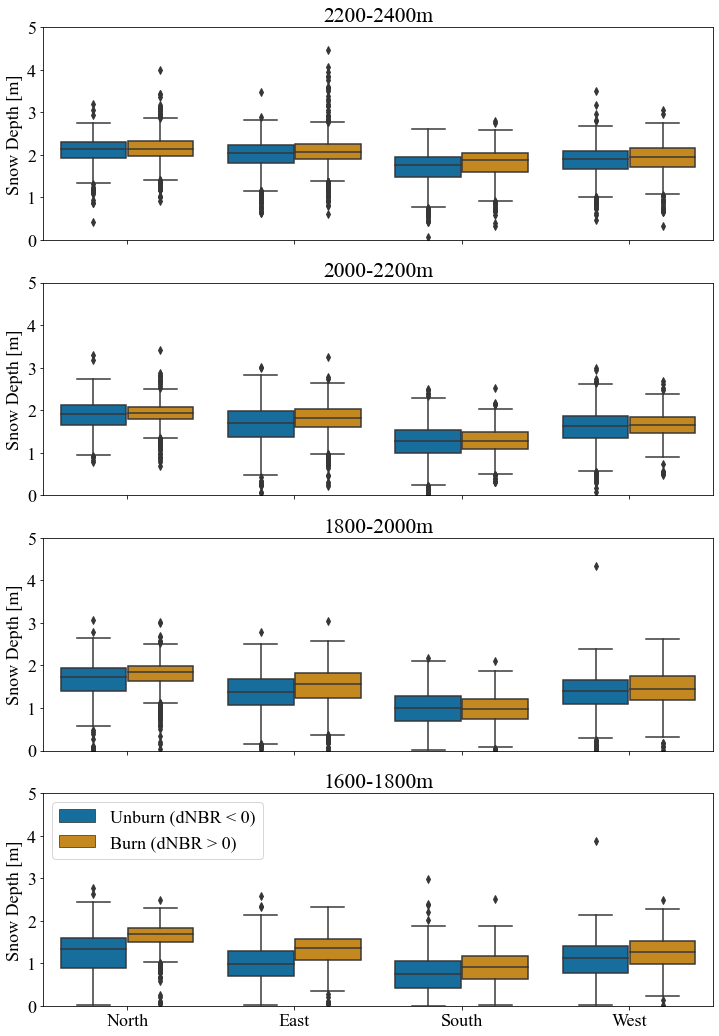

In [18]:
# Set font size and font family
plt.rcParams.update({'font.size': 18})
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

# Create figure object, axes, and subplots
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize =(12, 18))

# Add data
sns.boxplot(x='aspects', hue='sbs', y='snow', data=df4, ax=ax1, palette='colorblind')
sns.boxplot(x='aspects', hue='sbs', y='snow', data=df3, ax=ax2, palette='colorblind')
sns.boxplot(x='aspects', hue='sbs', y='snow', data=df2, ax=ax3, palette='colorblind')
sns.boxplot(x='aspects', hue='sbs', y='snow', data=df1, ax=ax4, palette='colorblind')

# Set subplot titles
ax1.set_title('2200-2400m')
ax2.set_title('2000-2200m')
ax3.set_title('1800-2000m')
ax4.set_title('1600-1800m')

# Set X axis labels
ax1.set_xlabel('')
ax2.set_xlabel('')
ax3.set_xlabel('')
ax4.set_xlabel('')
ax1.axes.xaxis.set_ticklabels([])
ax2.axes.xaxis.set_ticklabels([])
ax3.axes.xaxis.set_ticklabels([])
ax4.axes.xaxis.set_ticklabels(['North','East','South','West'])

# Set y axis label
ax1.set_ylabel('Snow Depth [m]')
ax2.set_ylabel('Snow Depth [m]')
ax3.set_ylabel('Snow Depth [m]')
ax4.set_ylabel('Snow Depth [m]')

# Set y lim
ax1.set_ylim(0,5)
ax2.set_ylim(0,5)
ax3.set_ylim(0,5)
ax4.set_ylim(0,5)

# Configure legends, remove
ax1.get_legend().remove()
ax2.get_legend().remove()
ax3.get_legend().remove()
ax4.legend()
leg=plt.legend(loc='best')
leg.get_texts()[0].set_text('Unburn (dNBR < 0)')
leg.get_texts()[1].set_text('Burn (dNBR > 0)')

# Show boxplots
plt.savefig('./plots/mcs_snowdepth_boxplots.jpg', bbox_inches='tight', dpi=300)